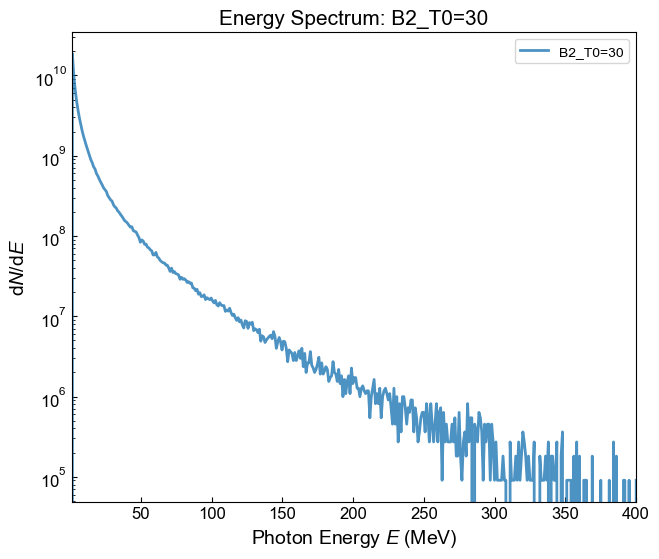

In [7]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',  # X轴刻度向内
    'ytick.direction': 'in',  # Y轴刻度向内
})

# 参数设置
E_J_to_MeV = 1.0 / 1.6e-13
step = 1
species = "Photon"

# 设置你要读取的单个文件路径
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1微米'
file_name = 'distfun0180.sdf'  # 你要查看的文件名
label = 'B2_T0=30'

file_path = os.path.join(base_dir, file_name)

# === 数据读取与处理 ===
data = sh.getdata(file_path)
E_J = getattr(data, f'Grid_allenergy0_{species}').data[0]
dN = getattr(data, f'dist_fn_allenergy0_{species}').data

E_MeV = E_J * E_J_to_MeV

length = len(E_MeV)
if length % step != 0:
    E_MeV = E_MeV[:-(length % step)]
    dN = dN[:-(length % step)]

# 多点合并bin
E_merged = np.mean(E_MeV.reshape(-1, step), axis=1)  # 每step个bin的能量均值
N_merged = np.sum(dN.reshape(-1, step), axis=1)       # 每step个bin的粒子数求和

dE_merged = np.mean(np.diff(E_merged))
spectrum_merged = N_merged / dE_merged

# === 绘图 ===
plt.figure(figsize=(7, 6))
plt.semilogy(E_merged, spectrum_merged, label=label, linewidth=2, alpha=0.8)

plt.xlabel(rf'{species} Energy $E$ (MeV)', fontsize=14)
plt.ylabel(r'd$N$/d$E$', fontsize=14)
plt.title(f'Energy Spectrum: {label}', fontsize=15)
plt.xlim(1, 400)
plt.tick_params(axis='both', direction='in', which='both', labelsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


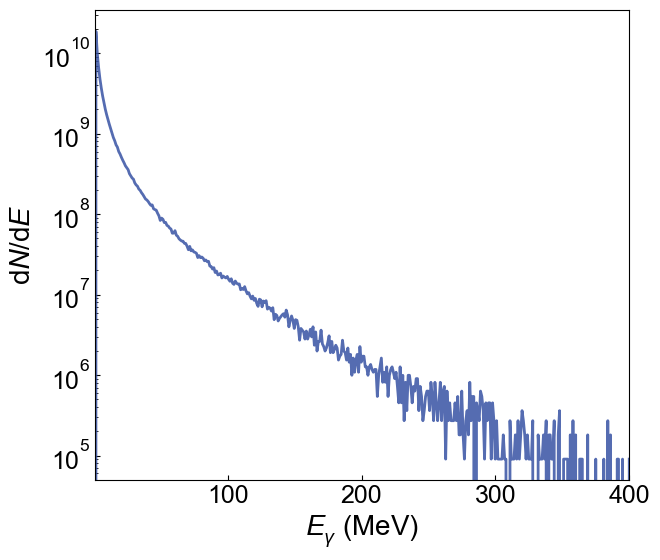

In [15]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# === 绘图样式设置 ===
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

# === 参数设置 ===
E_J_to_MeV = 1.0 / 1.6e-13         # 焦耳转MeV
step = 1                           # 能量bin合并步长
species = "Photon"                 # 粒子类型
label = 'B2_T0=30'                 # 曲线标签

# === 文件路径设置 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1微米'
file_name = 'distfun0180.sdf'
file_path = os.path.join(base_dir, file_name)

# === 数据读取 ===
data = sh.getdata(file_path)
E_J = getattr(data, f'Grid_allenergy0_{species}').data[0]     # 能量坐标（J）
dN = getattr(data, f'dist_fn_allenergy0_{species}').data      # 光子数密度分布

# === 数据处理 ===
E_MeV = E_J * E_J_to_MeV                                       # 转为 MeV 单位

# 对齐长度以便 reshape
length = len(E_MeV)
if length % step != 0:
    E_MeV = E_MeV[:-(length % step)]
    dN = dN[:-(length % step)]

# 合并能量 bin
E_merged = np.mean(E_MeV.reshape(-1, step), axis=1)
N_merged = np.sum(dN.reshape(-1, step), axis=1)

# 计算频谱（每单位能量的光子数）
dE_merged = np.mean(np.diff(E_merged))
spectrum_merged = N_merged / dE_merged

# === 绘图 ===
fig = plt.figure(figsize=(7, 6))
plt.semilogy(E_merged, spectrum_merged, label=label, linewidth=2, alpha=0.85,color='#3752A4')

plt.xlabel('$E_\\gamma$ (MeV)')
plt.ylabel(r'd$N$/d$E$')
# plt.title(f'Photon Energy Spectrum: {label}', fontsize=18)
plt.xlim(1, 400)
# plt.grid(True, which='both', linestyle='--', alpha=0.3)
# plt.legend()
plt.tight_layout()

# === 保存为 PDF 文件 ===
output_path = "/media/lan/Lexar/EPOCH代码/program1——cone代码/能谱.pdf"
fig.savefig(output_path, format='pdf')

plt.show()
